In [11]:
import os
import litellm
import base64
import json
import warnings
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
import requests
import networkx as nx 

# Load environment variables
load_dotenv()

# Suppress specific Pydantic warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pydantic")

custom_api_base = "https://litellmproxy.osu-ai.org" #Class 9 Section 1, key we use for API 
astro1221_key = os.getenv("ASTRO1221_API_KEY") 

conversation_prompt = """Have the characters 
Dr. Daniel Beer (an enthusiastic and inquisitive astrophysicist that studies cosmology, including dark matter
and dark energy, galactic evolution and quasars, and the intergalactic medium (IGM)), 
Dr. Davis Milk (a curious and passionate astrophysicist that studies supermassive black holes),
and Dr. Phil Marg (an excited and speculative astrophyscist that studies
cosmology, specifically galactic evolution and active galactic nuclei (AGN)) 
have a debate about the paper THE ORIGIN OF DUST IN EARLY-TYPE GALAXIES AND IMPLICATIONS FOR ACCRETION ONTO SUPERMASSIVE BLACK HOLES 

Paul Martini 1,4,  Daniel Dicken 2, and Thaisa Storchi-Bergmann 
."""

conversation_history = [{"role": "user", "content": conversation_prompt}]


In [7]:
#filename = "p_paper_abstract.txt"

#with open(filename, 'r') as f:  # 'r' means read mode
  #  lines = f.readlines()
    
#print(f"Read {len(lines)} lines from file")

Read 9 lines from file


In [8]:
def prompt_llm(messages, model="openai/GPT-4.1-mini", temperature=0.5, max_tokens=1000, tools=None, verbose=True): #Class 9 Section 1 
    """
    Send a prompt or conversation to an LLM using LiteLLM and return the response.
    """
    if isinstance(messages, str):
        messages = [{"role": "user", "content": conversation_prompt}] #changed "content": messages to --> "content":conversation_prompt (12/14)
    if not (isinstance(temperature, (int, float)) and 0 <= temperature <= 2): #kept all of this the same (12/14)
        raise ValueError("temperature must be a float between 0 and 2 (inclusive).")
    if not (isinstance(max_tokens, int) and max_tokens > 0):
        raise ValueError("max_tokens must be a positive integer.")
    #creates a prompt function prompt_llm(prompt, shows GPT version, med creativity, response length, tools, verbose = true provides detailed info)

    try: 
        print("Contacting LLM via University Server...")
        conversation_response = litellm.completion(
            model=model,
            messages=messages,
            tools=tools,
            api_base=custom_api_base,
            api_key=astro1221_key,
            temperature=temperature,
            max_tokens=max_tokens
        )
        conversation_answer = conversation_response['choices'][0]['message']['content'] #choices? what does this do, ask in class (12/12), added "conversation'" in front of response and answer variables
        if verbose: 
            print(f"\nSUCCESS! Here is the discussion from {model}:\n")
            print(conversation_answer + "\n")
            print(f"{conversation_answer['name']}: {conversation_answer['reply']}")
            conversation_history += f"{conversation_answer['name']}: {conversation_answer['reply']}\n"
    except Exception as e:
        print(f"\nERROR: Could not connect. Details:\n{e}")    
        conversation_response = None
    return conversation_response

In [9]:
prompt_llm(conversation_prompt)

Contacting LLM via University Server...

SUCCESS! Here is the discussion from openai/GPT-4.1-mini:

**Setting:** A virtual roundtable discussion among three astrophysicists—Dr. Daniel Beer, Dr. Davis Milk, and Dr. Phil Marg—focused on the recent paper *"THE ORIGIN OF DUST IN EARLY-TYPE GALAXIES AND IMPLICATIONS FOR ACCRETION ONTO SUPERMASSIVE BLACK HOLES"* by Martini, Dicken, and Storchi-Bergmann.

---

**Dr. Daniel Beer:**  
"Alright, colleagues, this paper really caught my eye because it connects the presence of dust in early-type galaxies with accretion processes onto supermassive black holes. From a cosmological perspective, understanding dust origin is crucial—not just for interpreting galactic evolution but also for grasping how the intergalactic medium might be enriched or affected by these processes."

**Dr. Davis Milk:**  
"Absolutely, Daniel. As someone deeply interested in supermassive black holes, I found their argument compelling that dust can serve as a tracer for accreti

Created response_data.csv
Columns: ['Name', 'Response']
Name: Dr. Daniel Beer, Response: Reply


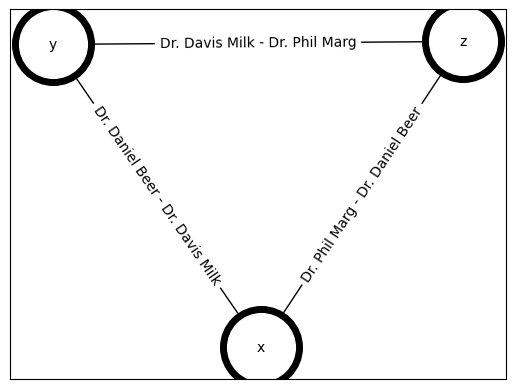

In [13]:
import csv
x = "Dr. Daniel Beer"
y = "Dr. Davis Milk"
z = "Dr. Phil Marg" 
nxG = nx.Graph()

edges = {
    ("x", "y"),
    ("y", "z"),
    ("z", "x"),
   
}

edge_labels = {
    ("x", "y"): "Dr. Daniel Beer - Dr. Davis Milk",
    ("y", "z"): "Dr. Davis Milk - Dr. Phil Marg",
    ("z", "x"): "Dr. Phil Marg - Dr. Daniel Beer" 
}

options = {
    "font_size": 10,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
}


response_data = [
    ['Dr. Daniel Beer', 'Reply',
     'Dr. Davis Milk',  'Reply', 
     'Dr. Phil Marg',   'Reply',]
]
with open('response_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    # Write header row
    writer.writerow(['Name', 'Response'])
    
    # Write data rows
    for response in response_data:
        writer.writerow(response)

print("Created response_data.csv")

with open('response_data.csv', 'r') as f:
    reader = csv.reader(f)
    
    # Read and skip header
    header = next(reader)
    print(f"Columns: {header}")
    
    # Read data rows
    for row in reader:
        print(f"Name: {row[0]}, Response: {row[1]}")


G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos, **options)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()